## Imports and Defs

### Imports

In [360]:
import requests
from bs4 import BeautifulSoup
import zipfile
import os
import io

from urllib.parse import urljoin
from io import BytesIO
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
import copy
import unidecode
import string
from tqdm import tqdm

import time
import datetime
import pickle


In [361]:
import assets.helper as b3

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from webdriver_manager.chrome import ChromeDriverManager
import unidecode
import string

import os
import re

import pandas as pd
import numpy as np

from google.cloud import storage
import io
from collections import OrderedDict

import requests
from bs4 import BeautifulSoup
import unidecode
import string
import datetime
import time

import pickle
from urllib.parse import urljoin
import zipfile
from lxml import html

from tqdm import tqdm
import shutil


In [362]:
# selenium functions
def load_browser():
    """
    Launches chromedriver and creates a wait object.
    
    Returns:
    tuple: A tuple containing a WebDriver instance and a WebDriverWait instance.
    """
    # Define the options for the ChromeDriver.
    options = Options()
    options.add_argument('--headless')  # Run in headless mode.
    options.add_argument('--no-sandbox')  # Avoid sandboxing.
    options.add_argument('--disable-dev-shm-usage')  # Disable shared memory usage.
    options.add_argument('--disable-blink-features=AutomationControlled')  # Disable automated control.
    # options = Options()
    options.add_argument('start-maximized')  # Maximize the window on startup.

    # Install and start the ChromeDriver service, passing in the options.
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    
    # Define the exceptions to ignore during WebDriverWait.
    exceptions_ignore = (NoSuchElementException, StaleElementReferenceException)
    
    # Create a WebDriverWait instance for the driver, using the specified wait time and exceptions to ignore.
    wait = WebDriverWait(driver, driver_wait_time, ignored_exceptions=exceptions_ignore)
    set_driver_and_wait(driver, wait)

    # Return a tuple containing the driver and the wait object.
    return driver, wait



### Variables and Functions

In [363]:
import assets.helper as b3
import assets.functions as run


## Content

#### Merge Mix and Match all

In [27]:
try:
    math = run.load_pkl(f'{b3.app_folder}math')
except Exception as e:
    math = run.get_math()
    math = run.save_pkl(math, f'{b3.app_folder}math')


In [ ]:

try:
    setorial = run.load_pkl(f'{b3.app_folder}setorial')
except Exception as e:
    setorial = run.get_classificacao_setorial(setorial='')
    setorial = run.save_pkl(setorial, f'{b3.app_folder}setorial')
# setorial.head(3)

In [5]:

try:
    b3_cvm = run.load_pkl(f'{b3.app_folder}b3_cvm')
except Exception as e:
    b3_cvm = run.b3_grab(b3.search_url)
    b3_cvm = run.save_pkl(b3_cvm, f'{b3.app_folder}b3_cvm')


In [ ]:
# SETOR: O setor econômico mais amplo ao qual a empresa pertence.
# SUBSETOR: Uma categorização mais específica dentro do setor mais amplo.
# SEGMENTO: Uma classificação ainda mais granular do negócio da empresa.
# DENOM_CIA: Esta é a denominação ou nome da empresa.
# COMPANHIA: Nome ou denominação oficial da empresa listada.
# PREGAO: Refere-se ao nome pelo qual a empresa é conhecida no pregão da bolsa de valores.
# LISTAGEM: Categoria ou segmento de listagem da empresa na bolsa de valores, que pode indicar o nível de governança corporativa ou outros critérios.
# TICK: Abreviação ou símbolo da empresa usada no mercado de ações.
# TICKERS: Símbolos de negociação da empresa em diferentes mercados ou plataformas.
# CD_CVM: Este poderia ser um código ou identificador único relacionado à empresa, possivelmente relacionado à Comissão de Valores Mobiliários do Brasil (CVM).
# CVM: Código ou identificador relacionado à empresa na Comissão de Valores Mobiliários, o órgão regulador do mercado de capitais no Brasil.
# ISIN: Número de Identificação Internacional de Valores Mobiliários – um identificador único para valores mobiliários.
# CNPJ_CIA: Este é o número do Cadastro Nacional da Pessoa Jurídica (CNPJ) da empresa, um identificador único para empresas no Brasil.
# CNPJ: Cadastro Nacional da Pessoa Jurídica – é o número de identificação das empresas brasileiras.
# SITE: Site oficial ou página relevante da empresa.
# ATIVIDADE: Descreve a principal atividade de negócios da empresa.

# ANO: Este é o ano ao qual os dados se referem.
# DT_REFER: Esta é a data de referência para a entrada de dados.
# DT_FIM_EXERC: Esta é a data final para o exercício ou período de relato financeiro.
# DT_INI_EXERC: Esta poderia ser a data inicial para o exercício ou período de relato financeiro.

# AGRUPAMENTO: Isso descreve o nível de agregação dos dados. Por exemplo, 'con' pode indicar dados consolidados.
# BALANCE_SHEET: Isso indica a seção específica da demonstração financeira, como Balanço Patrimonial ('BPA').
# GRUPO_DFP: Isso representa o tipo de grupo de demonstração financeira. Por exemplo, 'DF Consolidado - Balanço Patrimonial Ativo' sugere que é um balanço patrimonial consolidado focado em ativos.
# CD_CONTA: Este poderia ser um código ou identificador único relacionado a uma conta específica ou item de linha na demonstração financeira.
# DS_CONTA: Descreve a conta específica ou item de linha na demonstração financeira, como 'Ativo Total'.

# VL_CONTA: Representa o valor associado à conta específica ou item de linha.
# MOEDA: Isso indica a moeda na qual os valores são representados. 'REAL' sugere Real Brasileiro.
# ESCALA_MOEDA: Isso fornece a escala ou unidade para os valores monetários. 'MIL' pode indicar que os valores estão em milhares.

# ST_CONTA_FIXA: Pode indicar o status ou tipo de conta. O significado de valores como 'S' dependeria do contexto dos dados.
# COLUNA_DF: O propósito desta coluna não é imediatamente claro a partir da amostra. Pode representar algum tipo de classificação ou categorização relacionada aos dados financeiros.

# ESCRITURADOR: Entidade ou empresa responsável por registrar ou gerenciar os valores mobiliários da empresa.
# ACIONISTAS: Informações ou identificadores relacionados aos acionistas da empresa.

# FILENAME: Este é o arquivo de onde os dados são originados. Ele fornece o nome do arquivo que contém a respectiva entrada de dados.
# DEMONSTRATIVO: Este representa o tipo de demonstração financeira. Pode indicar se os dados são de um relatório intermediário (como 'itr') ou de outro tipo de relatório financeiro.
# VERSAO: Isso pode representar a versão ou iteração dos dados/relatórios financeiros.

columns = [
    'SETOR_x',
    'SUBSETOR_x',
    'SEGMENTO_x',
    'DENOM_CIA',
        # 'COMPANHIA',
    'PREGAO',
    'LISTAGEM',
    'TICK',
    'TICKERS',
    'CD_CVM',
        # 'CVM',
        # 'ISIN',
    'CNPJ_CIA',
        # 'CNPJ',
    'SITE',
    'ATIVIDADE',
        # 'ANO',
    'DT_REFER',
        # 'DT_FIM_EXERC',
        # 'DT_INI_EXERC',
    'AGRUPAMENTO',
    'BALANCE_SHEET',
    # 'GRUPO_DFP',
    'CD_CONTA',
    'DS_CONTA',
    'VL_CONTA',
    # 'MOEDA',
    # 'ESCALA_MOEDA',
    # 'ST_CONTA_FIXA',
    # 'COLUNA_DF',
    'ESCRITURADOR',
    'ACIONISTAS', 
    # 'FILENAME', 
    # 'DEMONSTRATIVO', 
    # 'VERSAO',
]


In [32]:
b3_cvm.keys()

dict_keys(['BENS INDUSTRIAIS', 'COMUNICACOES', 'CONSUMO CICLICO', 'CONSUMO NAO CICLICO', 'FINANCEIRO', 'MATERIAIS BASICOS', 'NAO CLASSIFICADOS', 'Nenhum', 'OUTROS', 'PETROLEO GAS E BIOCOMBUSTIVEIS', 'SAUDE', 'TECNOLOGIA DA INFORMACAO', 'UTILIDADE PUBLICA'])

In [330]:
columns = ['FILENAME', 'DEMONSTRATIVO', 'BALANCE_SHEET', 'ANO', 'AGRUPAMENTO',
       'CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'DT_FIM_EXERC', 'CD_CONTA', 'DS_CONTA',
       'VL_CONTA', 'ST_CONTA_FIXA', 'DT_INI_EXERC', 'COLUNA_DF', 'COMPANHIA',
       'PREGAO', 'TICK', 'LISTAGEM', 'TICKERS', 'ISIN', 
       'ATIVIDADE', 'SETOR', 'SUBSETOR', 'SEGMENTO', 'SITE', 'ESCRITURADOR',]
df = b3_cvm['CONSUMO CICLICO'][columns].set_index('DT_REFER')
df = convert_columns(df)
df['DENOM_CIA'].unique()

['AMERICANAS SA', 'GAFISA SA', 'COGNA EDUCACAO SA', 'T4F ENTRETENIMENTO SA', 'PDG REALTY SA EMPREEND E PARTICIPACOES  EM REC JUDICIAL', ..., 'VESTE SA ESTILO', 'VIVARA PARTICIPACOES SA', 'KALLAS INCORPORACOES E CONSTRUCOES SA', 'PLANO  PLANO DESENVOLVIMENTO IMOBILIARIO SA', 'TEGRA INCORPORADORA SA']
Length: 102
Categories (102, object): ['ALLIED TECNOLOGIA SA', 'ALPARGATAS SA', 'ALPHAVILLE SA', 'AMERICANAS SA', ..., 'VULCABRAS SA', 'WHIRLPOOL SA', 'YDUQS PARTICIPACOES SA', 'ZAMP SA']

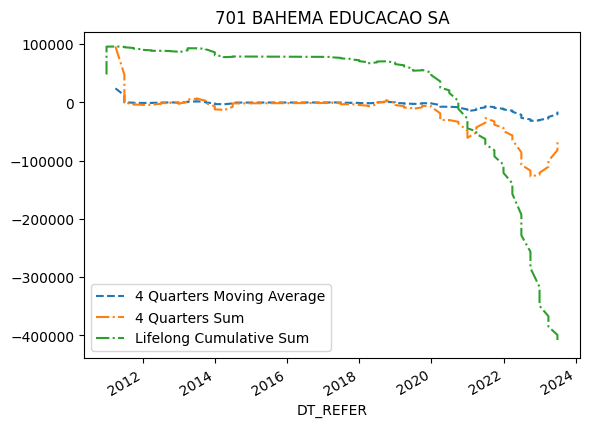

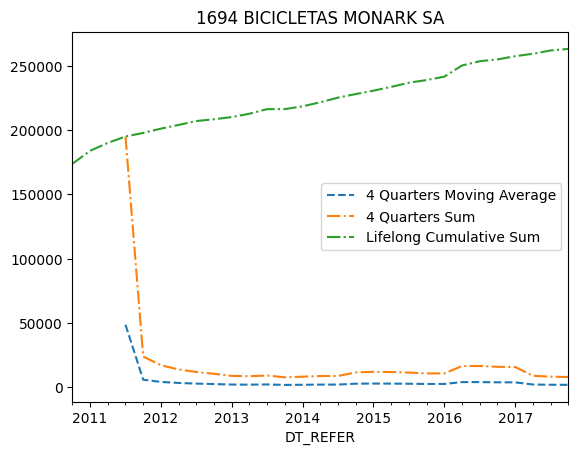

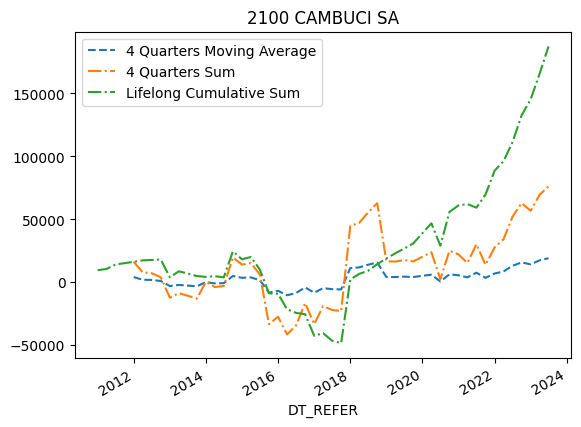

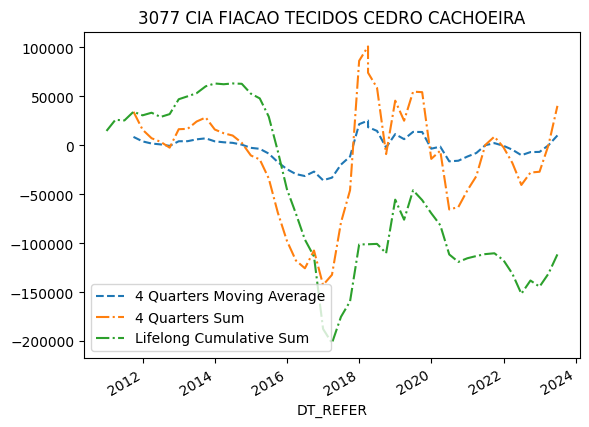

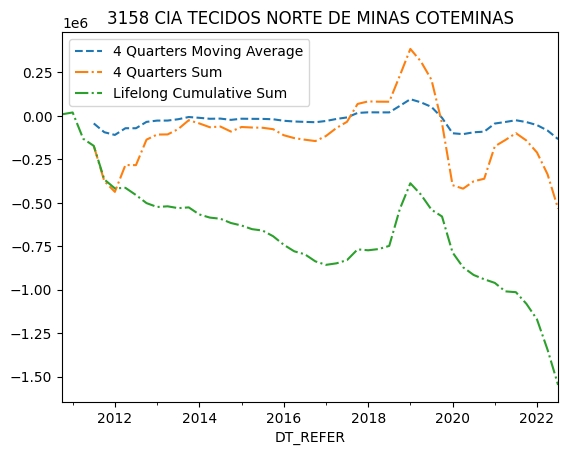

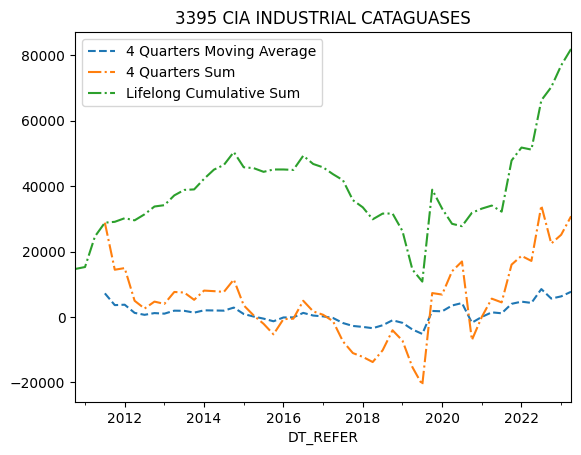

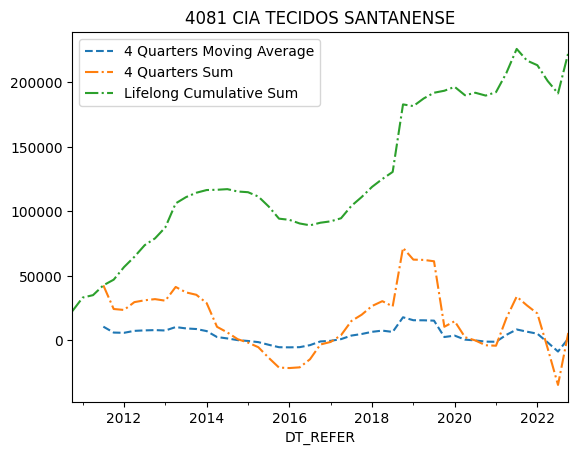

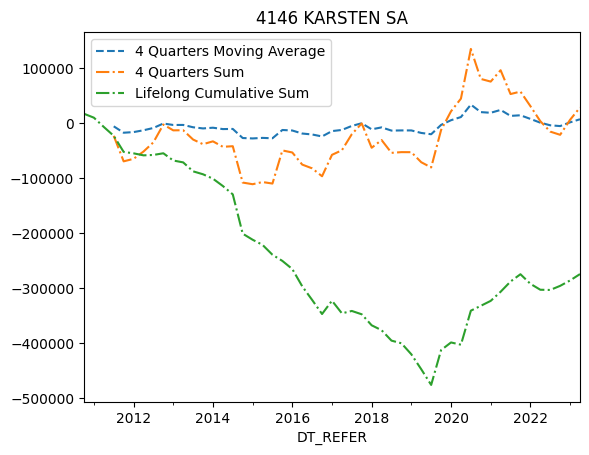

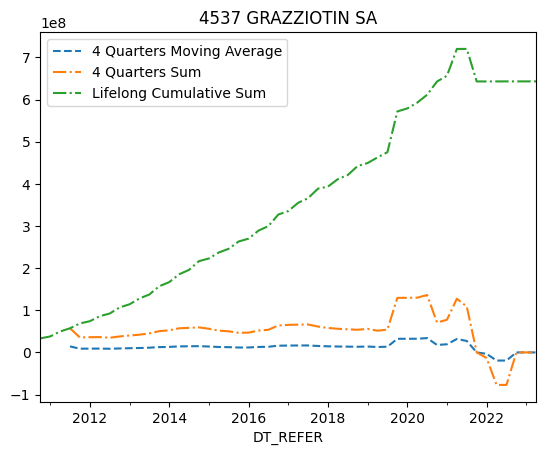

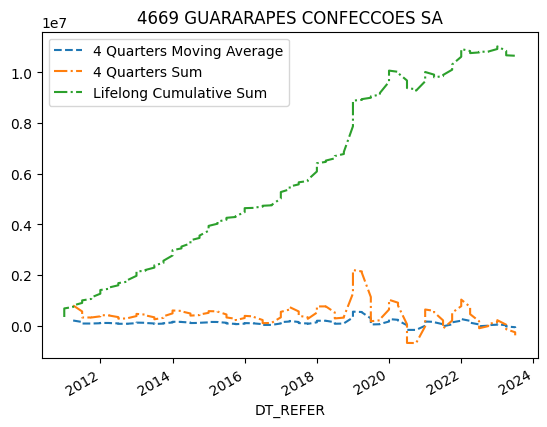

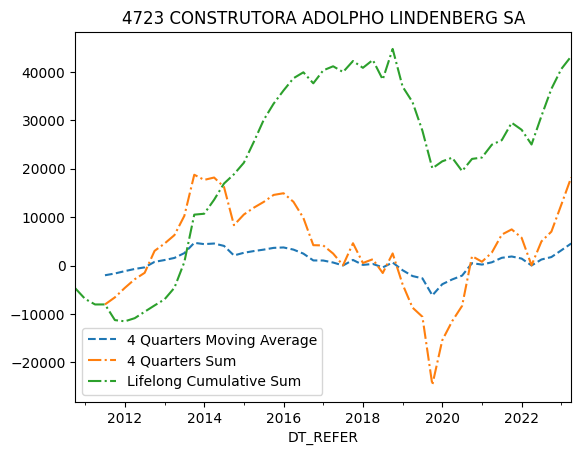

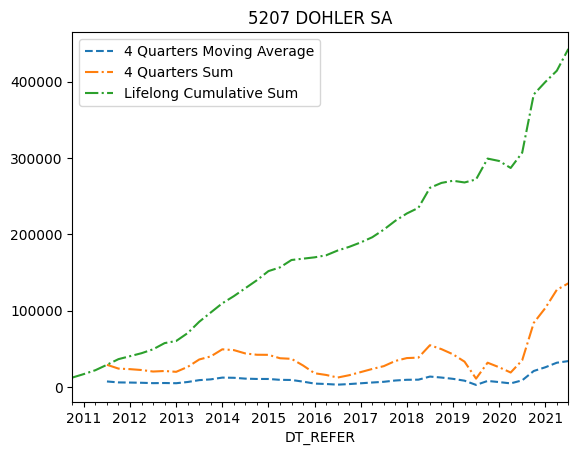

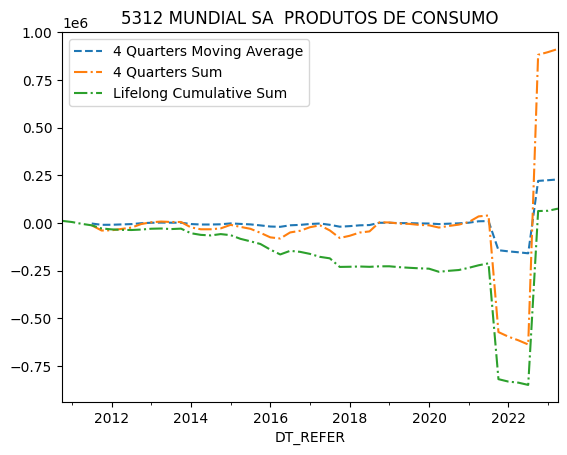

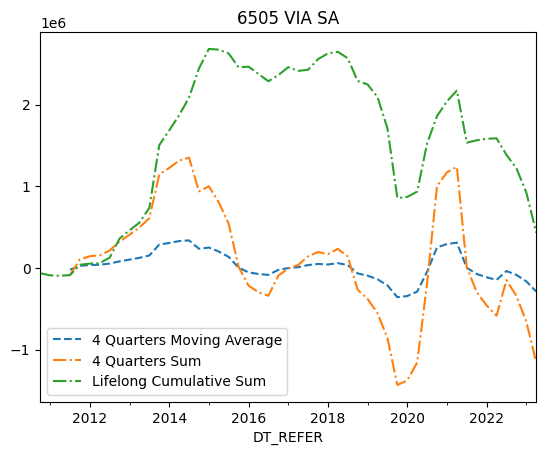

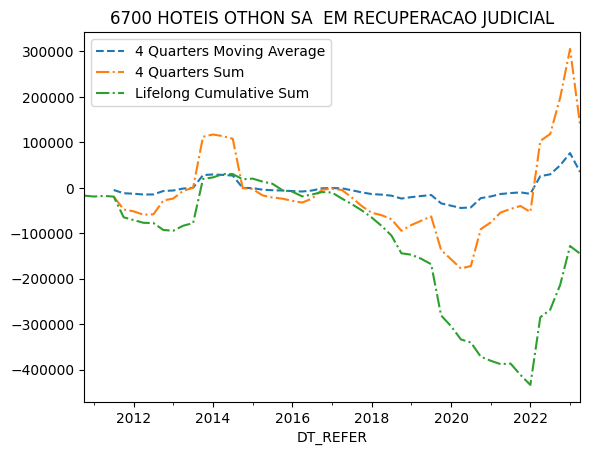

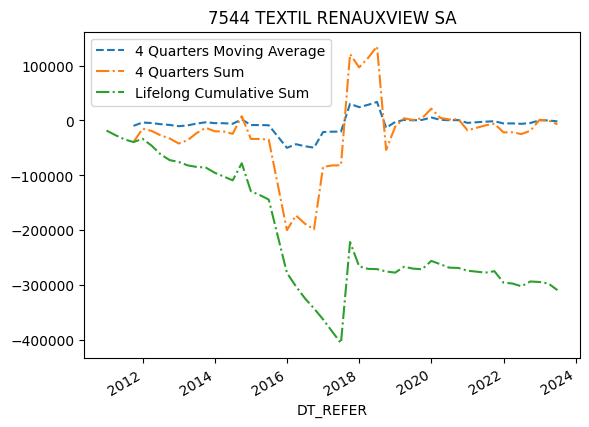

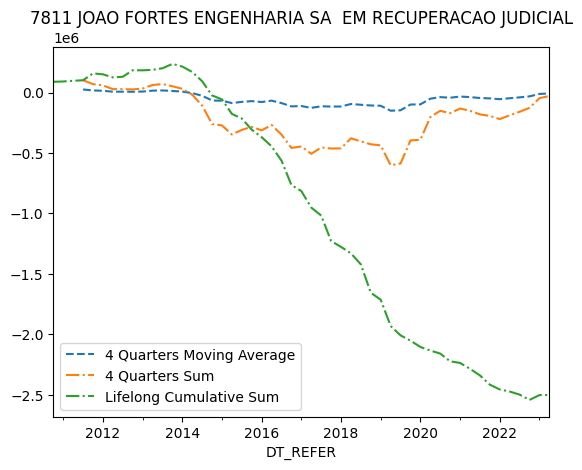

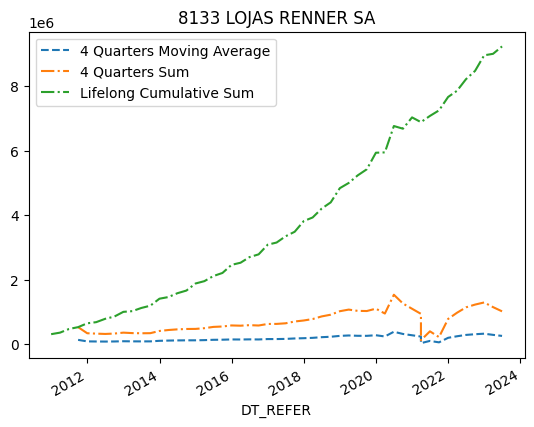

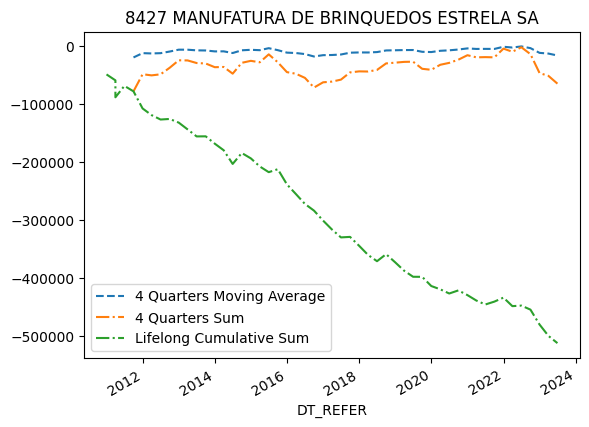

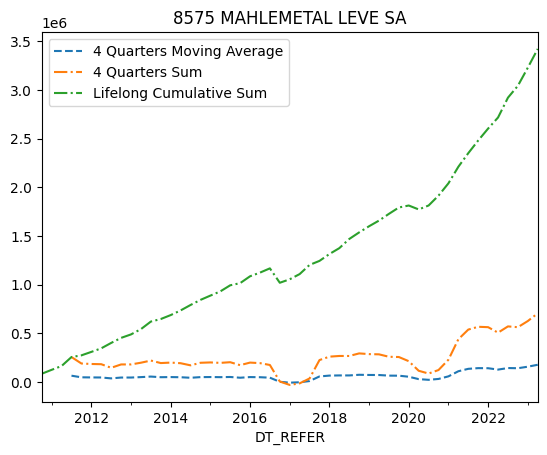

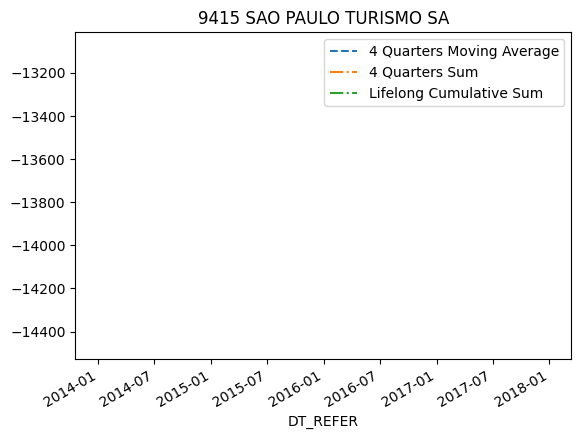

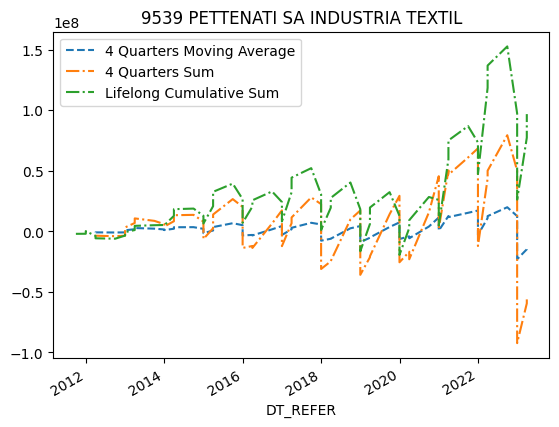

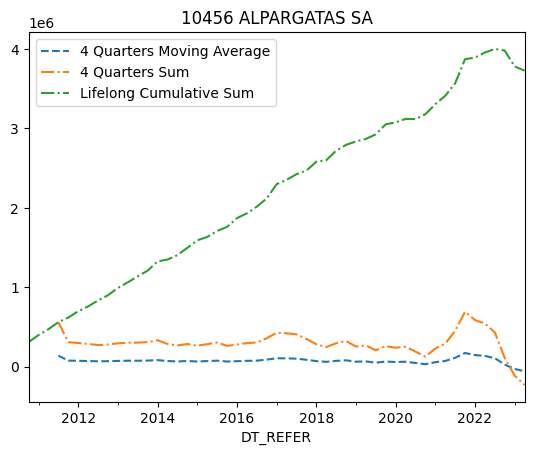

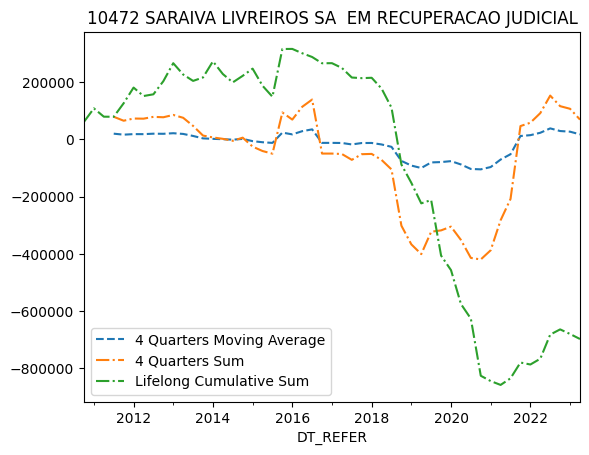

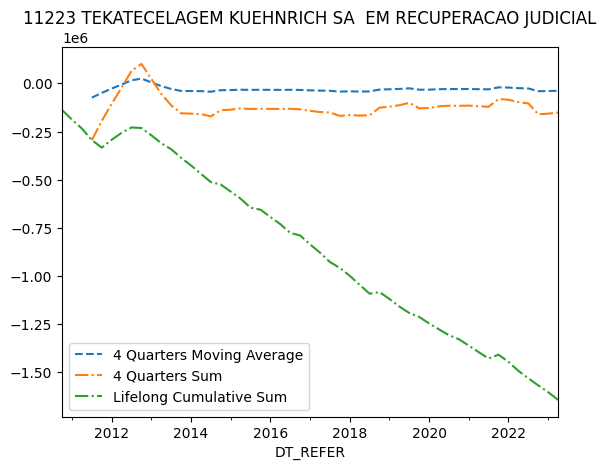

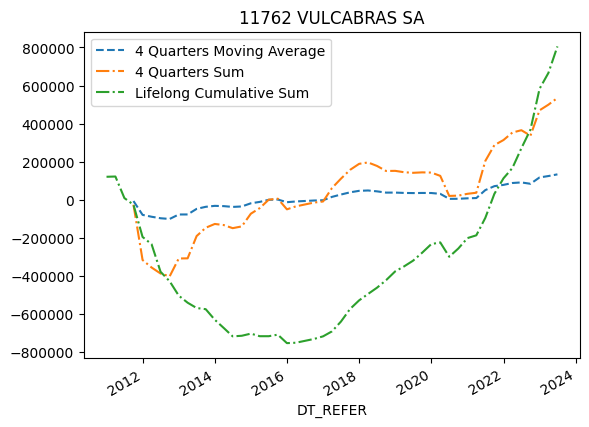

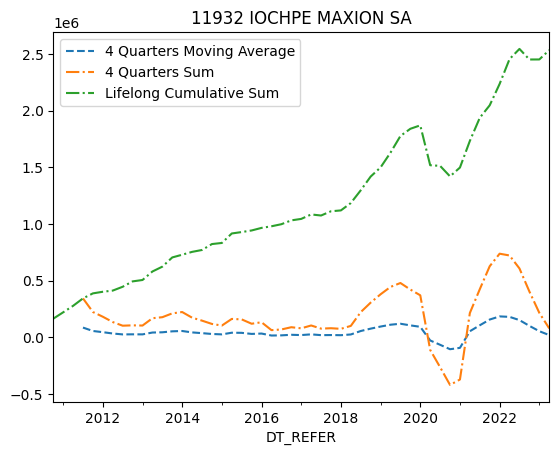

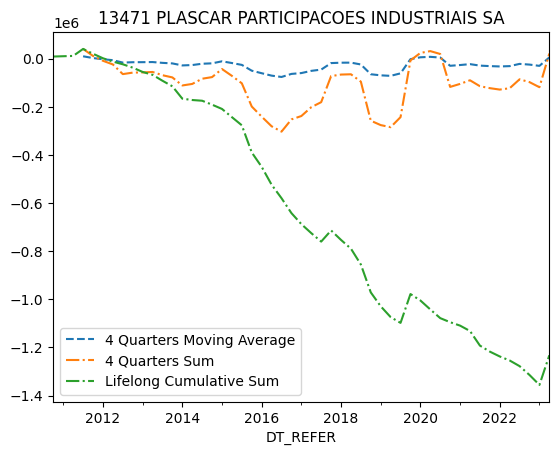

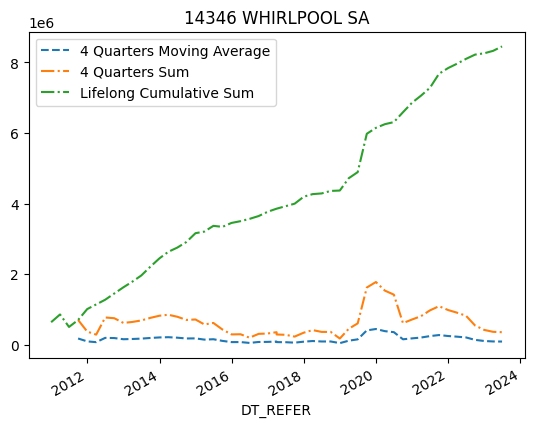

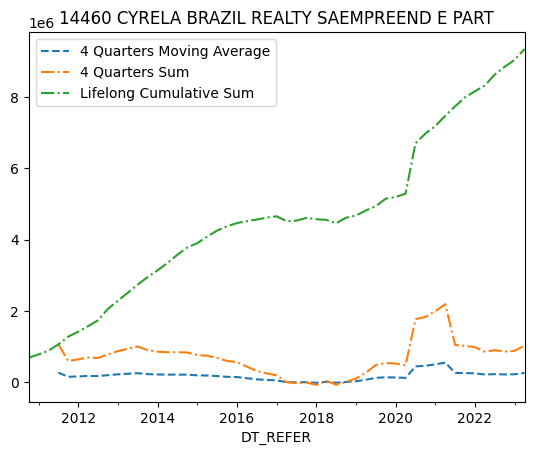

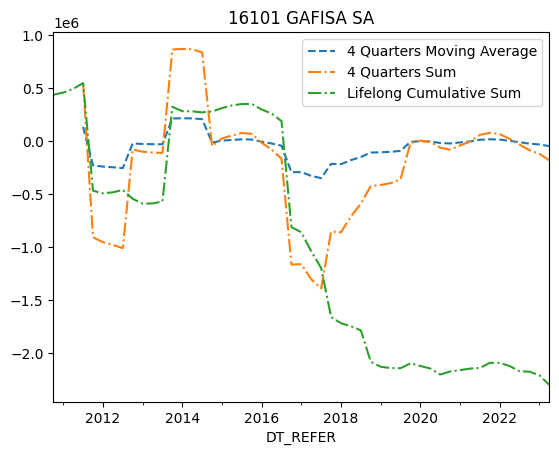

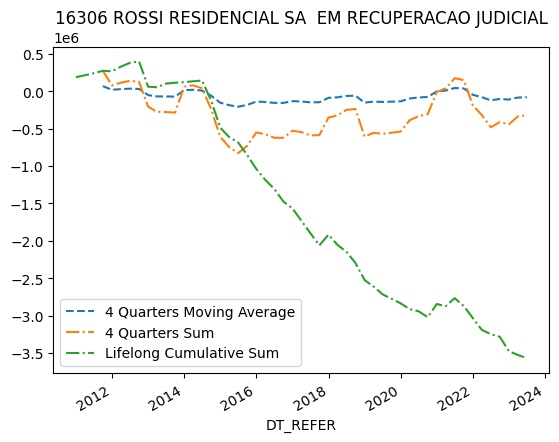

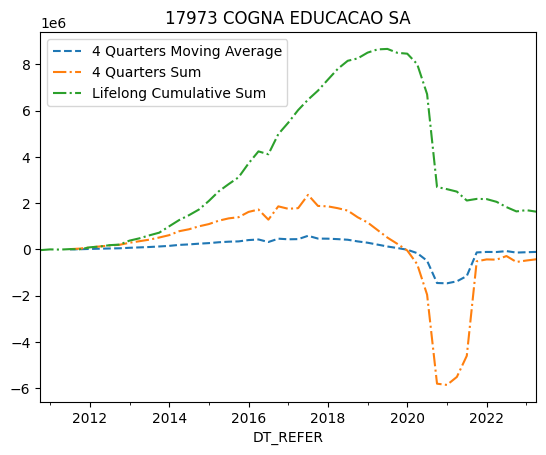

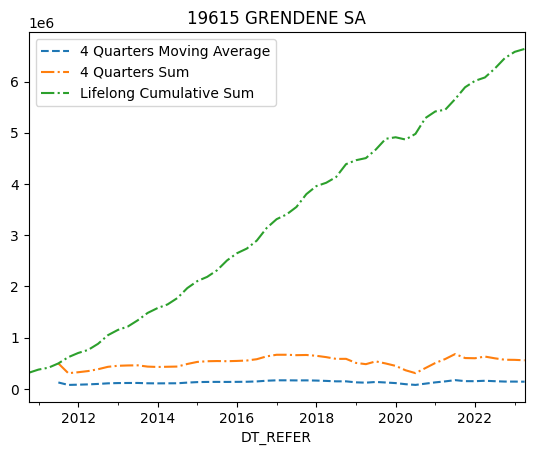

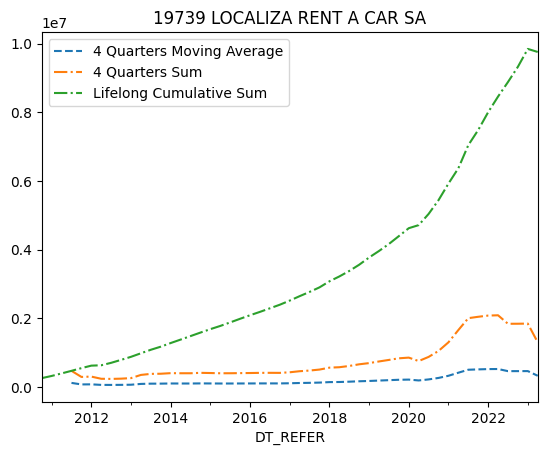

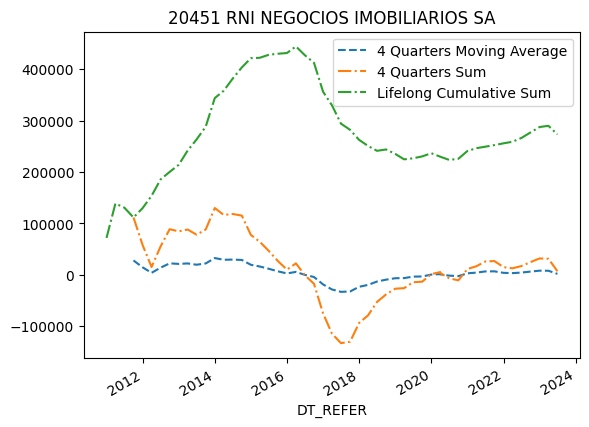

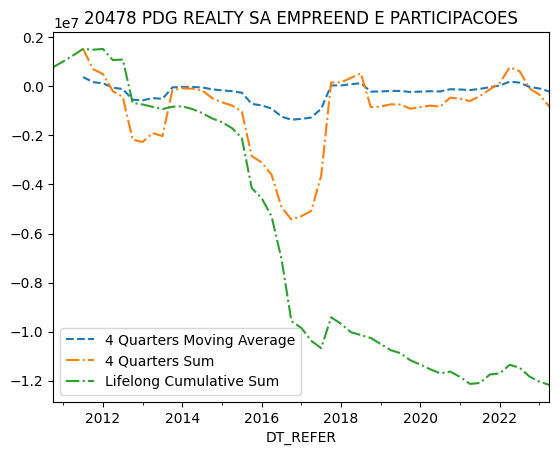

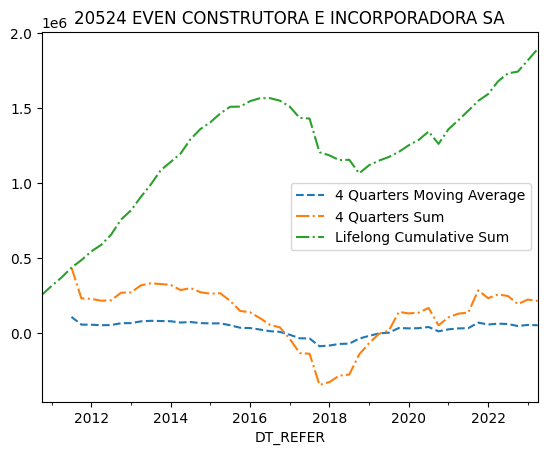

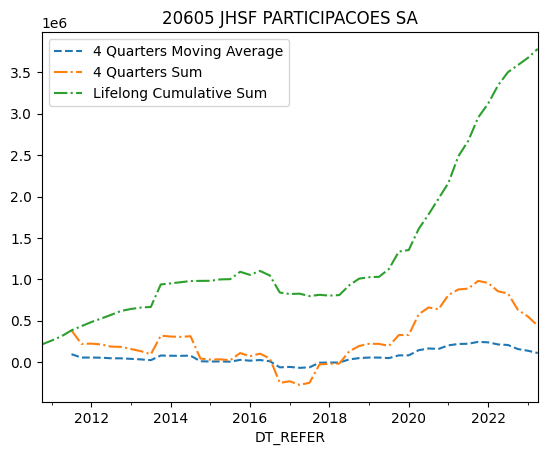

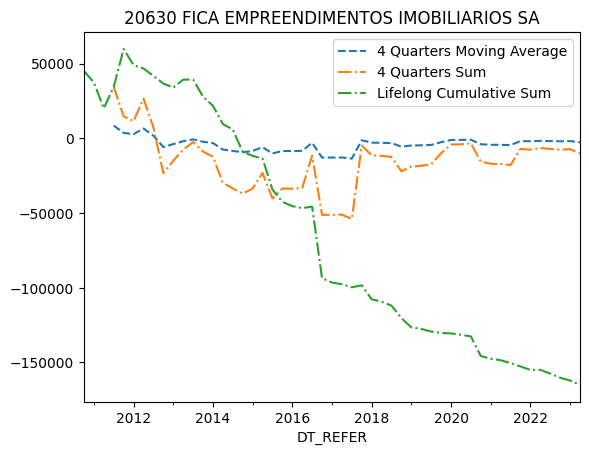

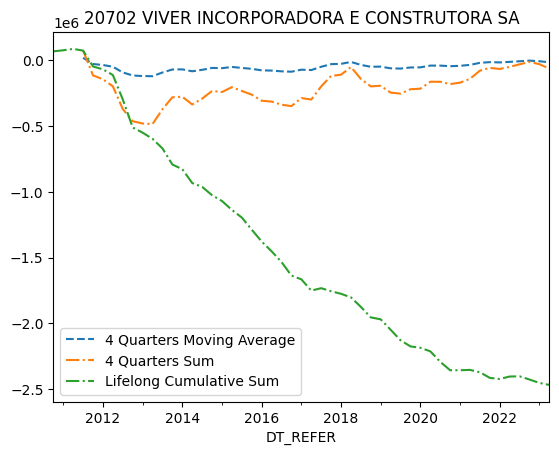

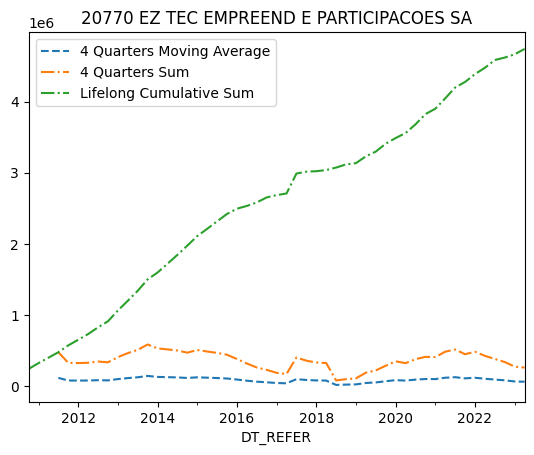

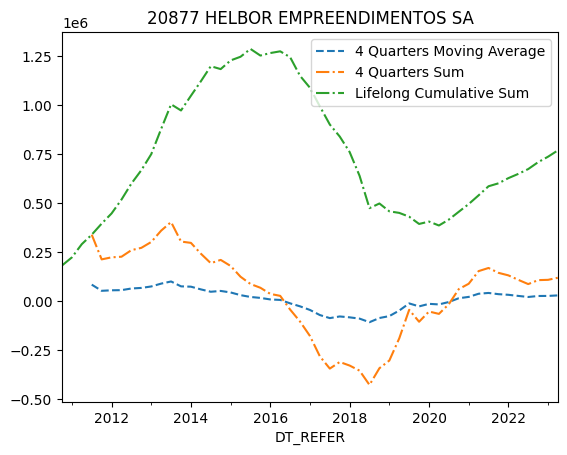

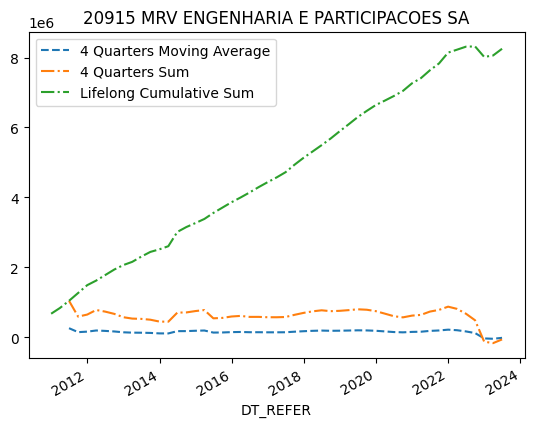

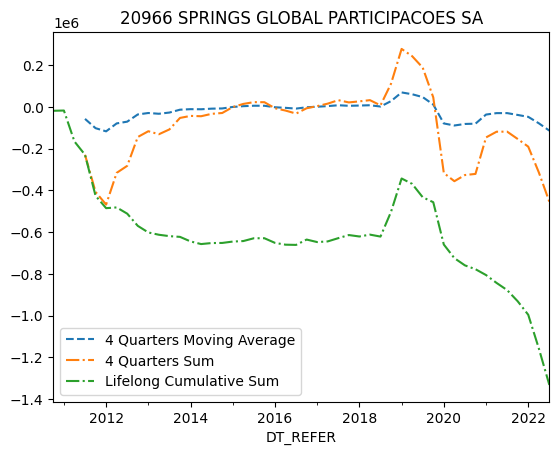

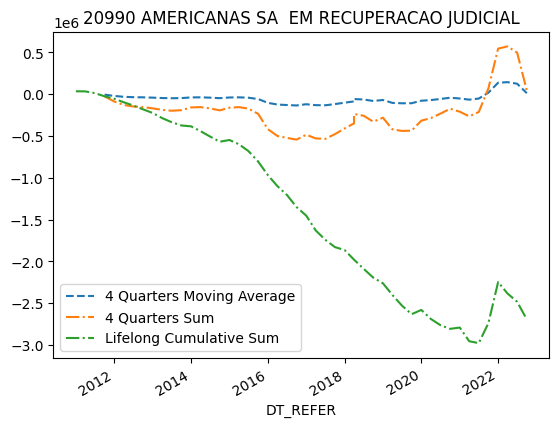

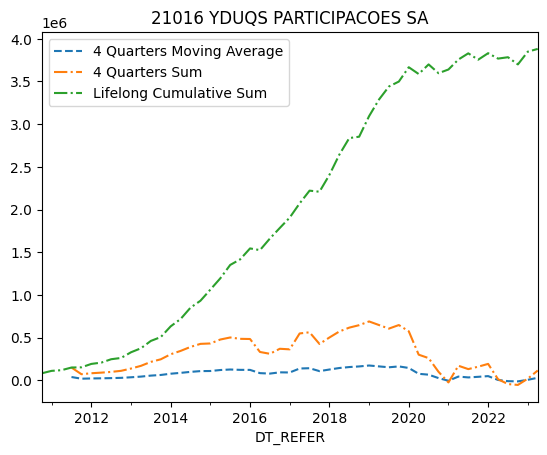

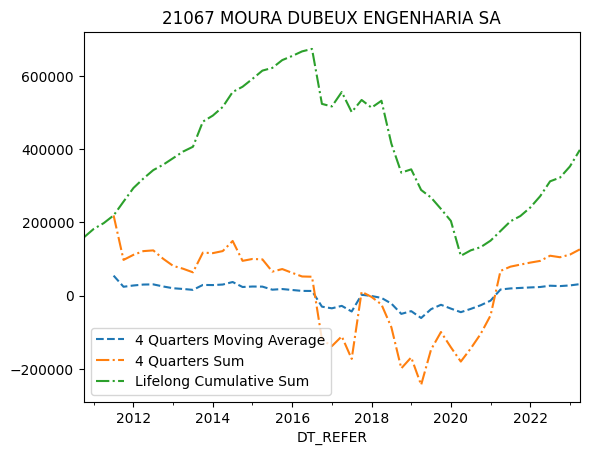

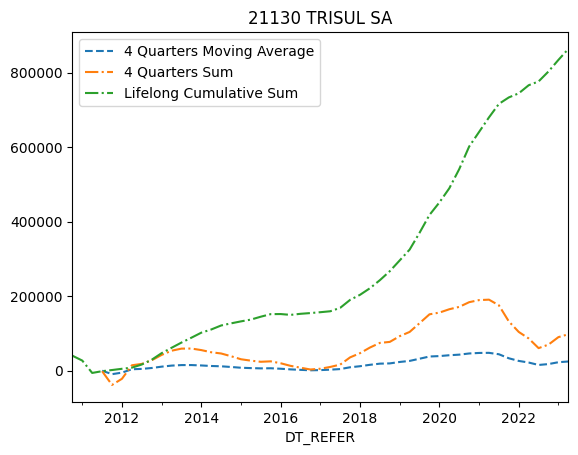

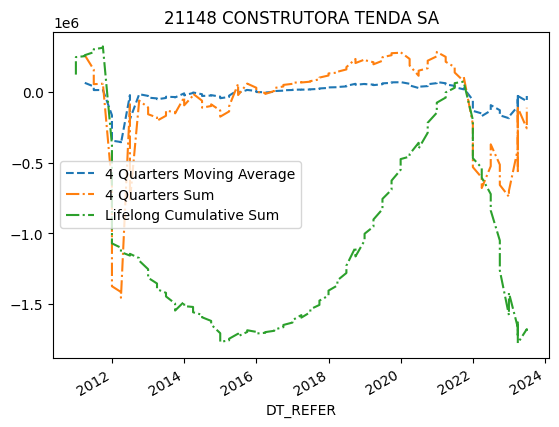

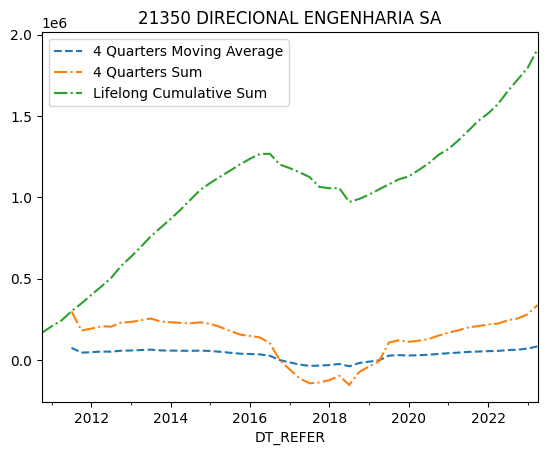

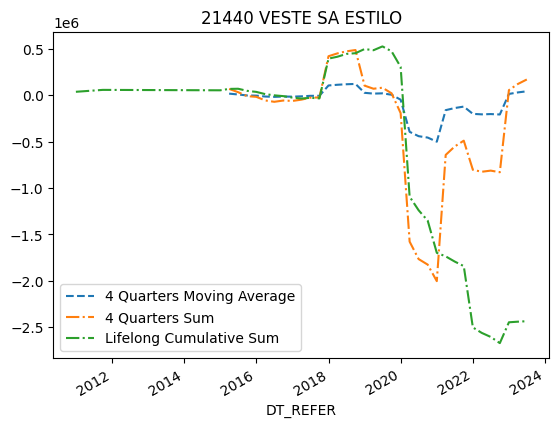

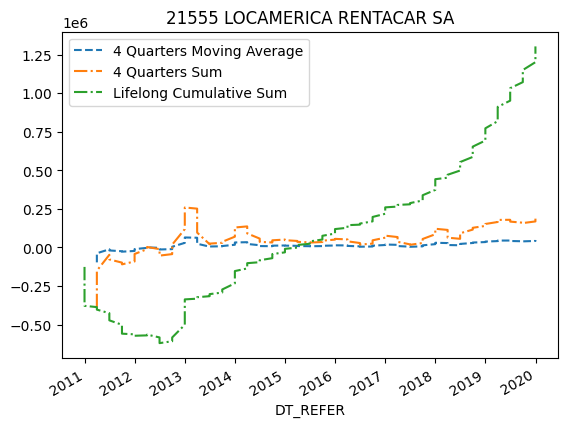

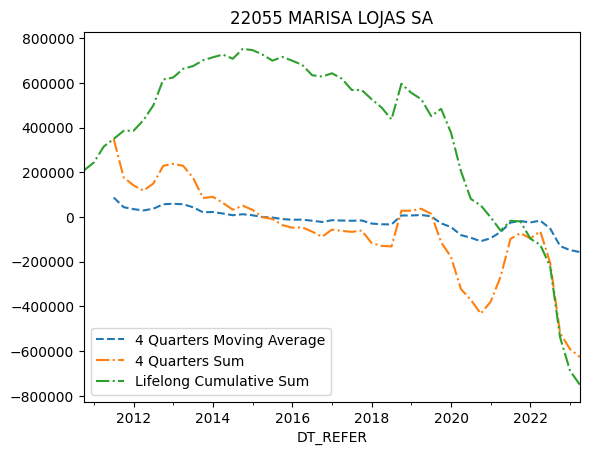

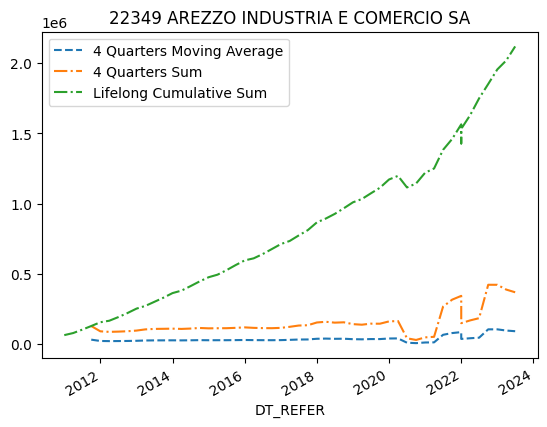

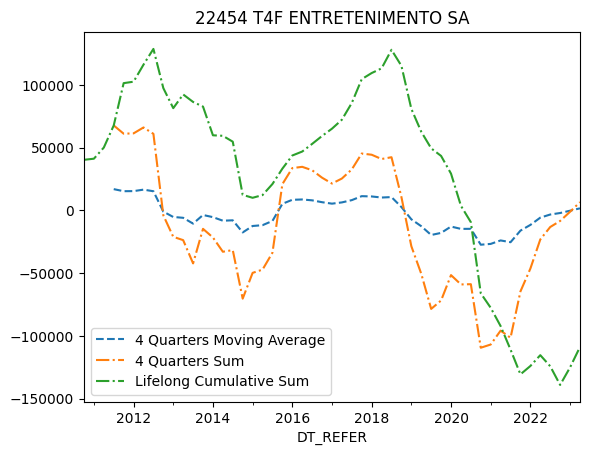

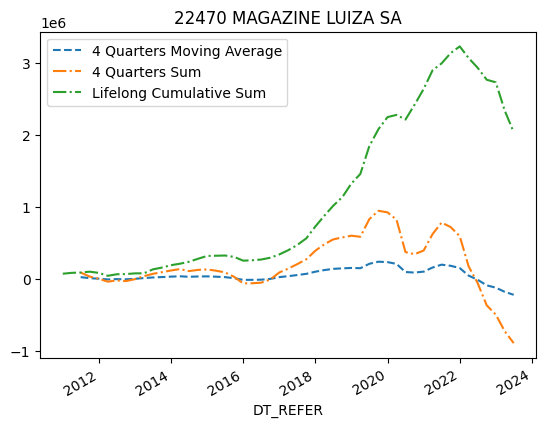

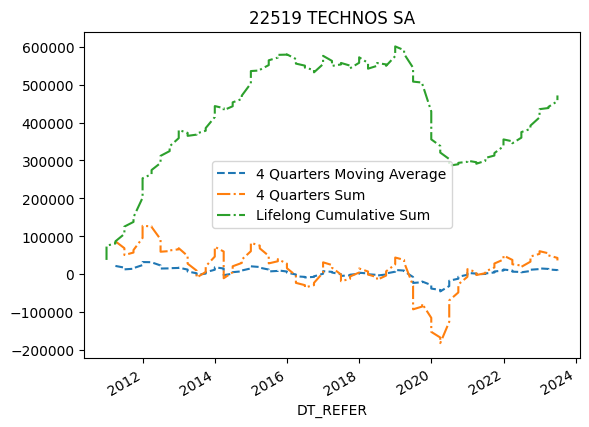

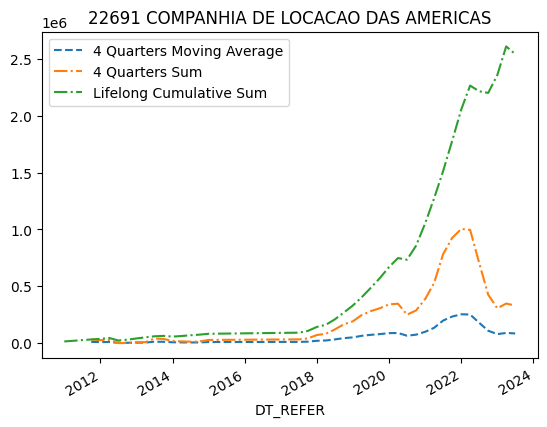

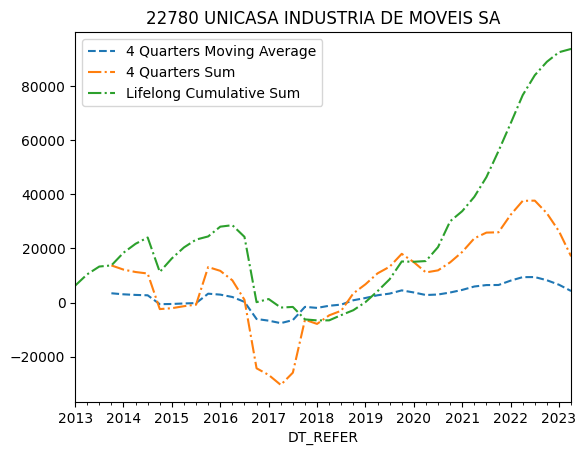

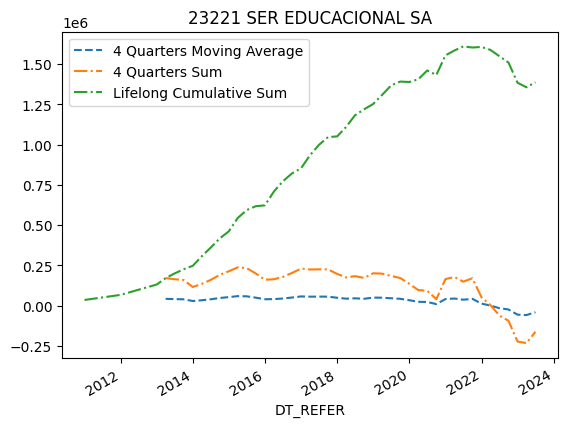

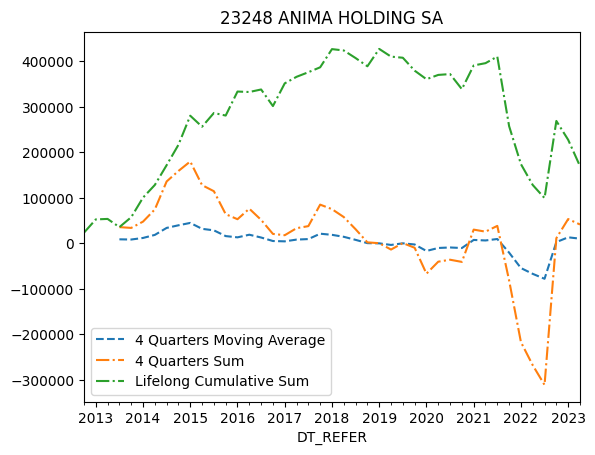

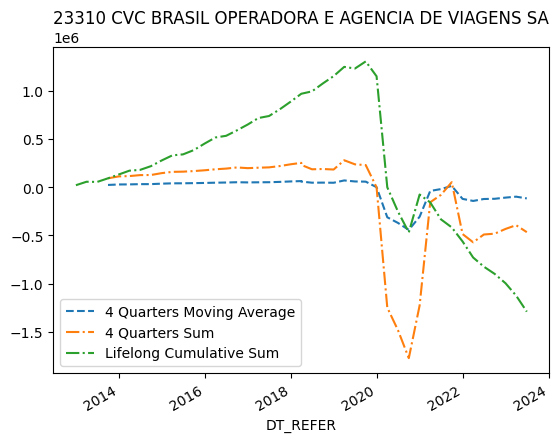

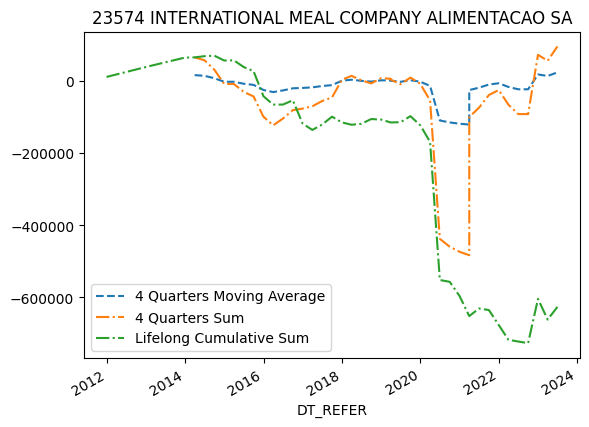

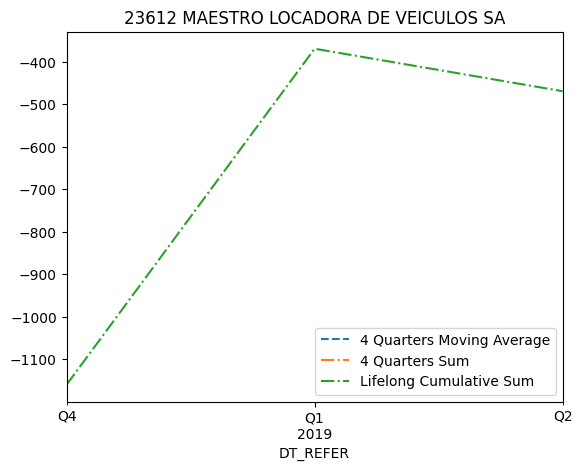

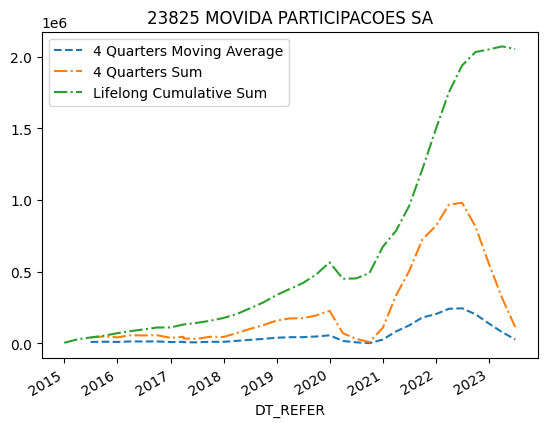

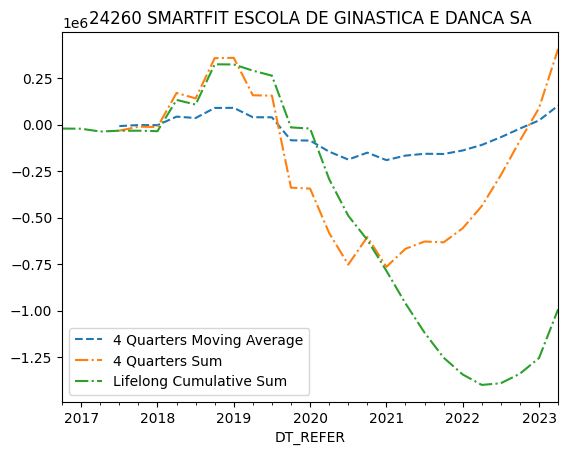

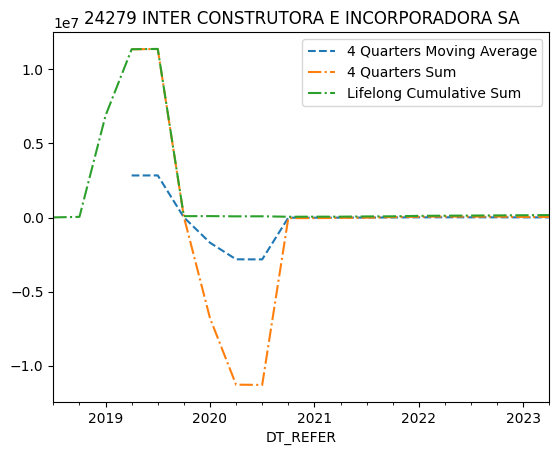

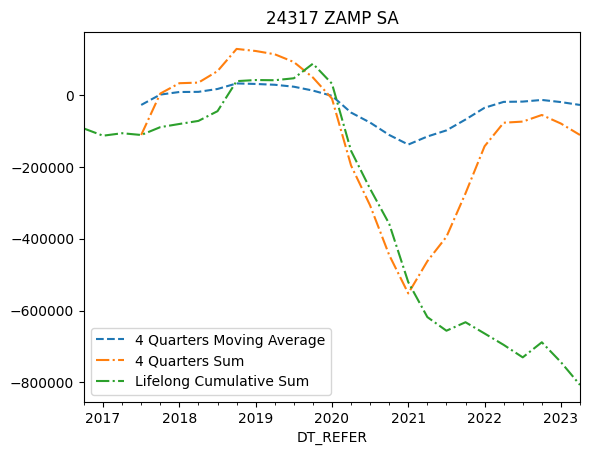

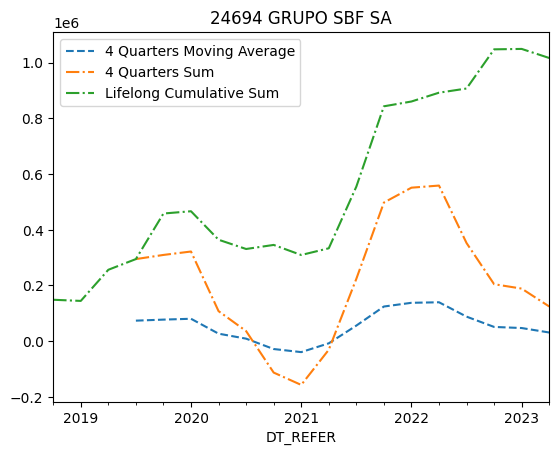

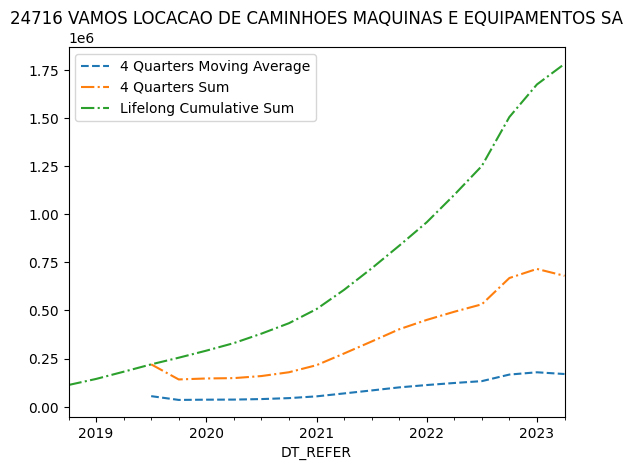

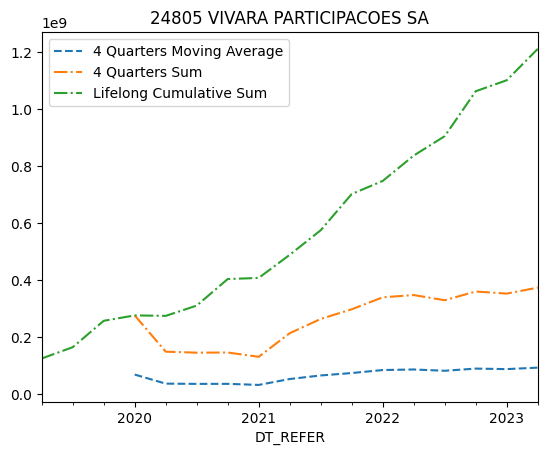

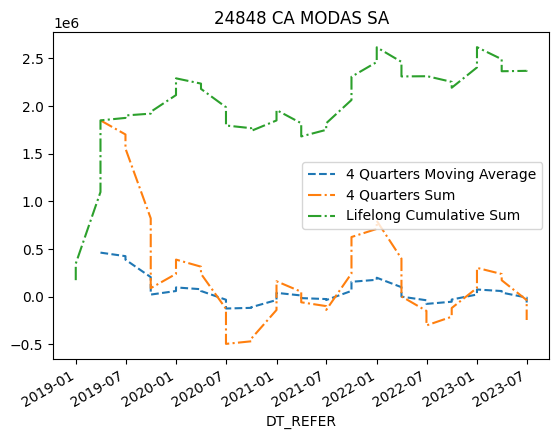

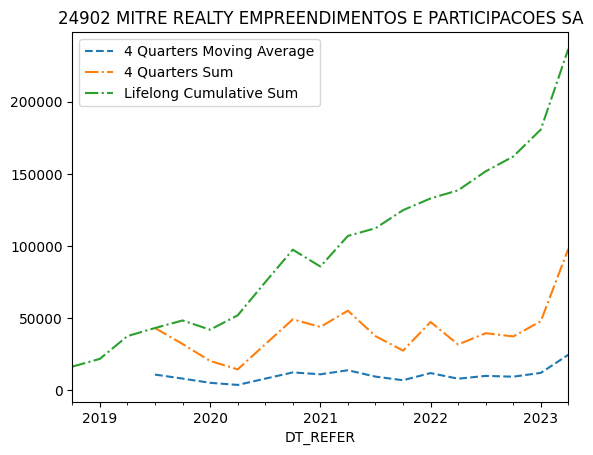

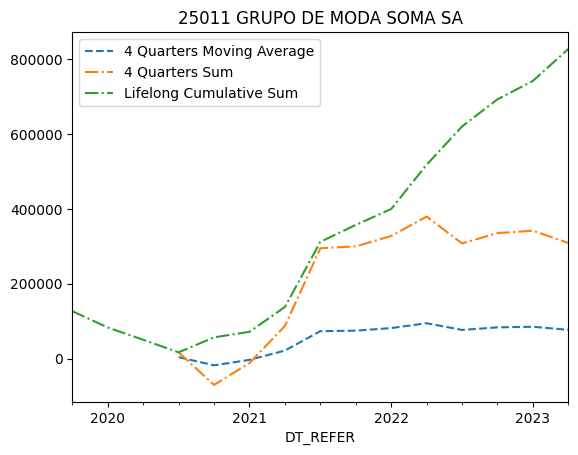

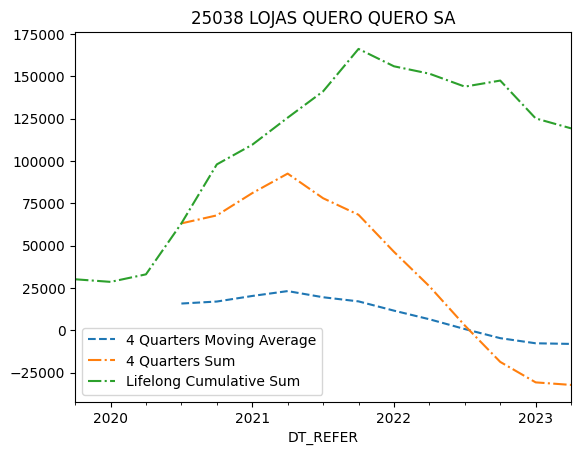

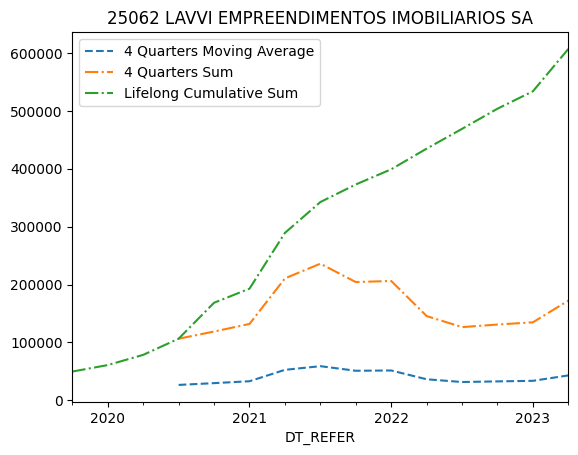

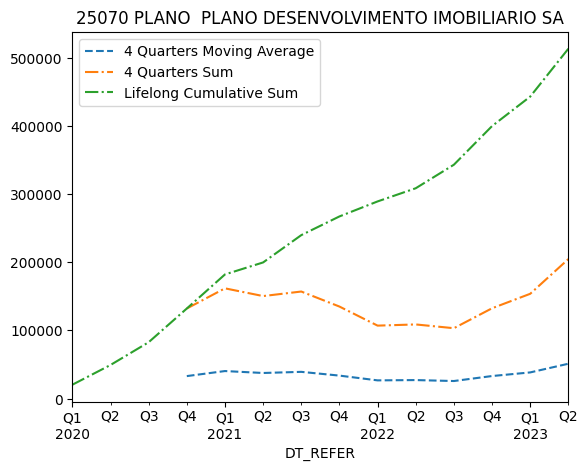

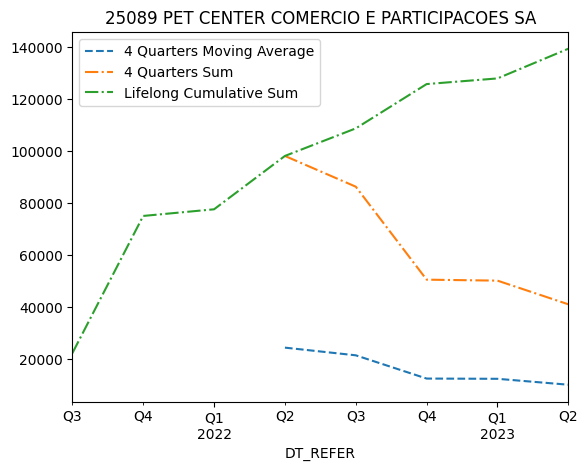

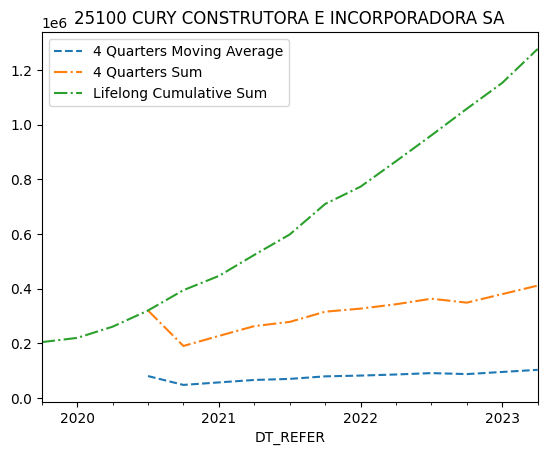

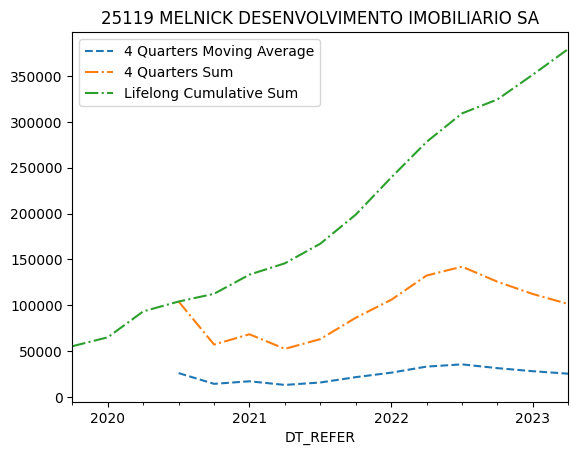

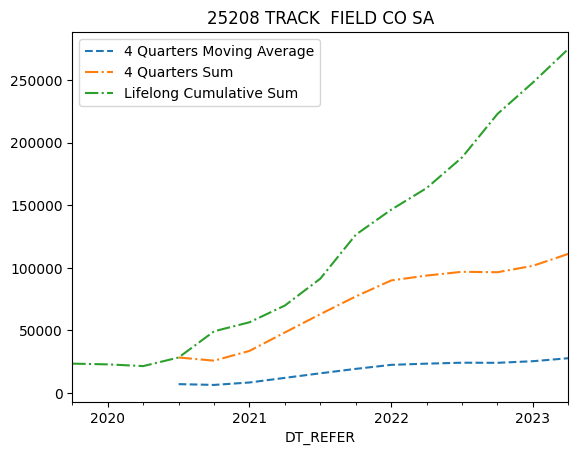

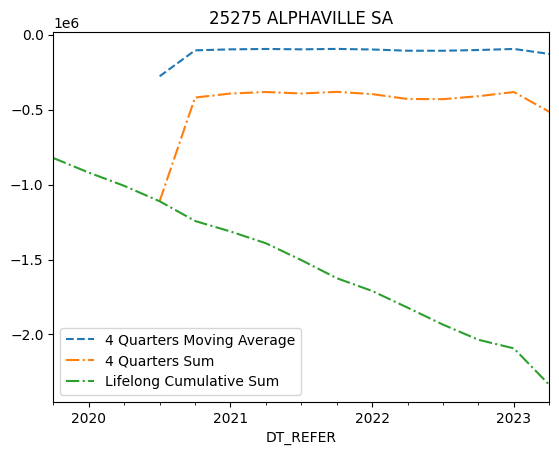

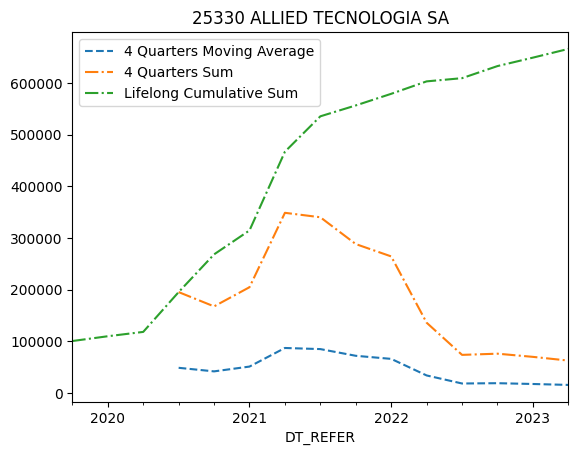

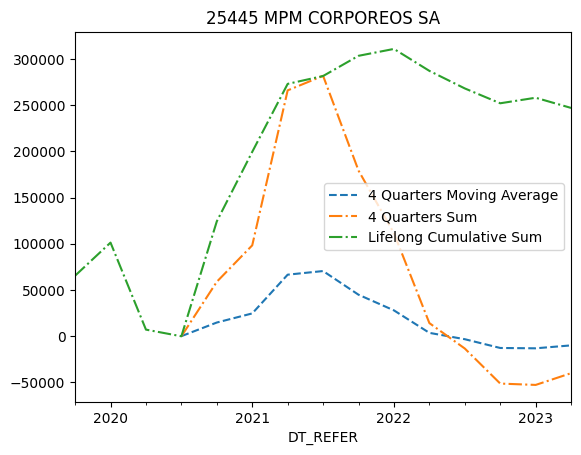

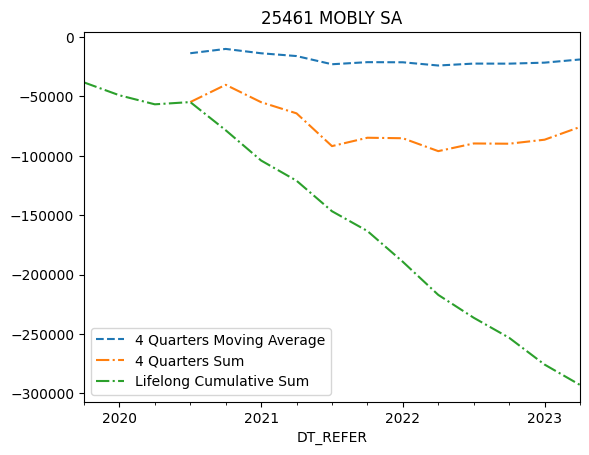

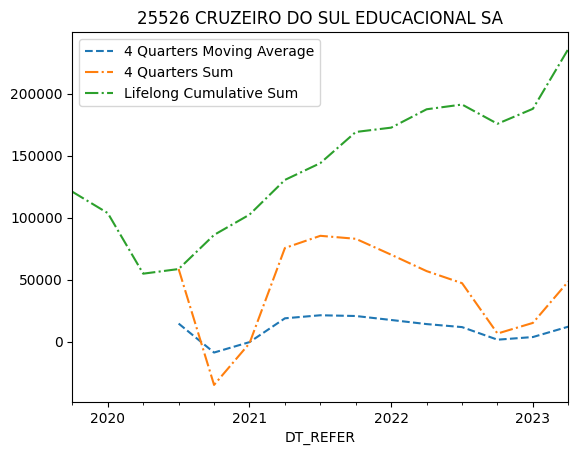

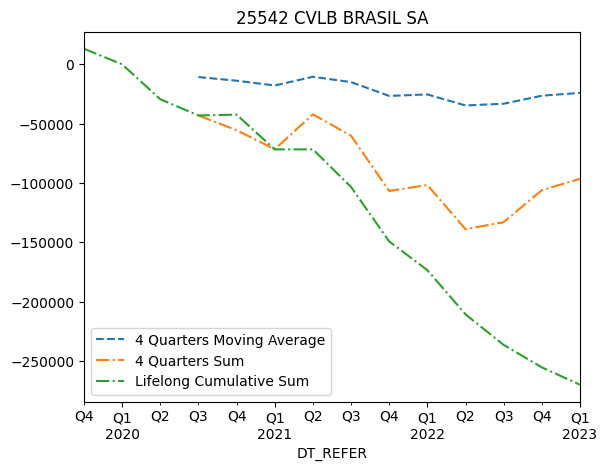

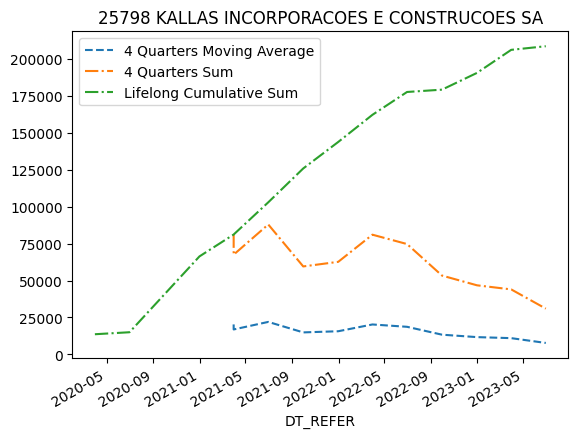

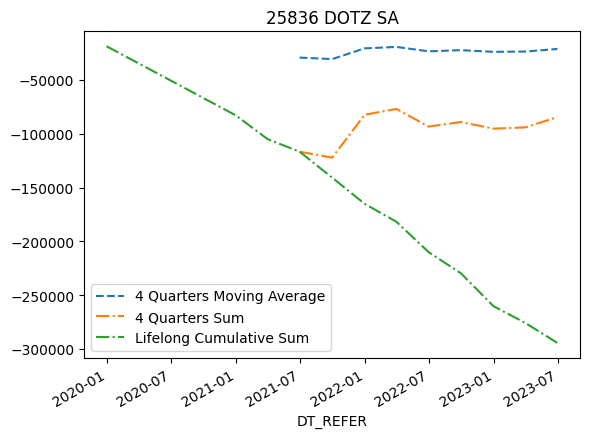

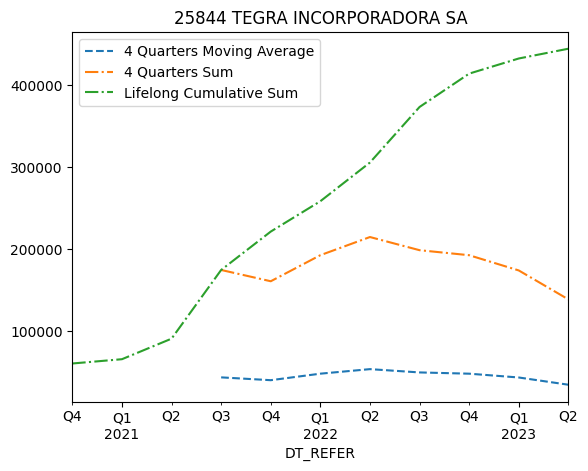

True

In [278]:
def plot_group(cias_por_setor, window):
    for company, group_df in cias_por_setor:
        try:
            # Calculate the moving average for the last 4 periods
            group_df['MA'] = group_df['VL_CONTA'].rolling(window=window).mean()
            
            # Calculate the rolling sum for the last 4 periods
            group_df['Rolling_Sum'] = group_df['VL_CONTA'].rolling(window=window).sum()
            
            # Calculate the lifelong cumulative sum
            group_df['Cumulative_Sum'] = group_df['VL_CONTA'].cumsum()
            
            # Plot raw data
            # group_df['VL_CONTA'].plot(label='Raw Data', legend=True)

            # Plot moving average
            group_df['MA'].plot(label=f'{window} Quarters Moving Average', legend=True, linestyle='--')
            
            # Plot rolling sum
            group_df['Rolling_Sum'].plot(label=f'{window} Quarters Sum', legend=True, linestyle='-.')
            
            # Plot lifelong cumulative sum
            group_df['Cumulative_Sum'].plot(label='Lifelong Cumulative Sum', legend=True, linestyle='-.')

            plt.title(f"{group_df['CD_CVM'].iloc[-1]} {group_df['DENOM_CIA'].iloc[-1]}")
            plt.show()
        except Exception as e:
            print(f"Error plotting for {company}: {e}")
    return True

cias_por_setor = df[(df['AGRUPAMENTO'] == 'con') & (df['CD_CONTA'] == '3.11')].groupby('CD_CVM')
window = 4*1
plot_group(cias_por_setor, window)

In [ ]:
import matplotlib.pyplot as plt

cias_por_setor = df[(df['AGRUPAMENTO'] == 'con') & (df['CD_CONTA'] == '2.03')].groupby('DENOM_CIA')

fig, ax = plt.subplots(figsize=(10, 6))

for company, group_df in cias_por_setor:
    try:
        group_df[['VL_CONTA']].plot(ax=ax, label=company)
    except:
        print(company)

ax.set_title("VL_CONTA by Company")
ax.set_ylabel("VL_CONTA")
ax.set_xlabel("Index")
ax.legend(loc="best")

plt.show()
